In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy

In [7]:
#import csv files and #turn csv into a dataframe
csv="../Resources/GlobalLandTemperaturesByState.csv"
data = pd.read_csv(csv)
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [8]:
#remove null values
data1=data.dropna()
data1.count()

dt                               620027
AverageTemperature               620027
AverageTemperatureUncertainty    620027
State                            620027
Country                          620027
dtype: int64

In [9]:
#Extracting year and month from the data(data1) 
data1['Year'] = data1['dt'].str[:4]
data1['Month'] = data1['dt'].str[6:7]
data1.head()

/Users/kaiwenli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kaiwenli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
0,1855-05-01,25.544,1.171,Acre,Brazil,1855,5
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,6
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,7
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,8
4,1855-09-01,25.675,1.014,Acre,Brazil,1855,9


In [10]:
#extracting june july august data from  data1 and name the file (june_july_august_data)
june_july_august_data=data1[(data1['Month'] >= "6") & (data1['Month'] <= "8")]
june_july_august_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,6
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,7
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,8
13,1856-06-01,24.930,1.355,Acre,Brazil,1856,6
15,1856-08-01,24.615,1.053,Acre,Brazil,1856,8


In [11]:
#convert the temperature from Celsius to Fahrenheit 

data1["AverageTemperature"] =(data1["AverageTemperature"]*1.8+32)
data1.head()

/Users/kaiwenli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
0,1855-05-01,77.9792,1.171,Acre,Brazil,1855,5
1,1855-06-01,75.6104,1.103,Acre,Brazil,1855,6
2,1855-07-01,75.8678,1.044,Acre,Brazil,1855,7
3,1855-08-01,77.7686,1.073,Acre,Brazil,1855,8
4,1855-09-01,78.2150,1.014,Acre,Brazil,1855,9


# JUNE JULY AUGUST DATA OF NEW_YORK WITH TEMPERATURE

In [13]:
# From (june_july_august_data) Extracting only New_York 
New_York_data=june_july_august_data[(june_july_august_data['State'] == 'New York')]
New_York_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
372829,1744-06-01,19.389,2.072,New York,United States,1744,6
372830,1744-07-01,20.413,1.993,New York,United States,1744,7
372901,1750-06-01,17.273,1.887,New York,United States,1750,6
372902,1750-07-01,22.412,1.863,New York,United States,1750,7
372903,1750-08-01,20.281,1.864,New York,United States,1750,8


In [14]:
#Taking out mean  of Average temperature  for  each  same year 
New_York_State_group = New_York_data.groupby(["State","Year"], as_index=False)
New_York_State_temp_mean = New_York_State_group.mean()

New_York_State_temp_mean.head()

,State,Year,AverageTemperature,AverageTemperatureUncertainty
0,New York,1744,19.901000,2.032500
1,New York,1750,19.988667,1.871333
2,New York,1751,19.849667,1.845667
3,New York,1753,19.767667,3.576000
4,New York,1754,19.555000,2.870333


<function matplotlib.pyplot.show(*args, **kw)>

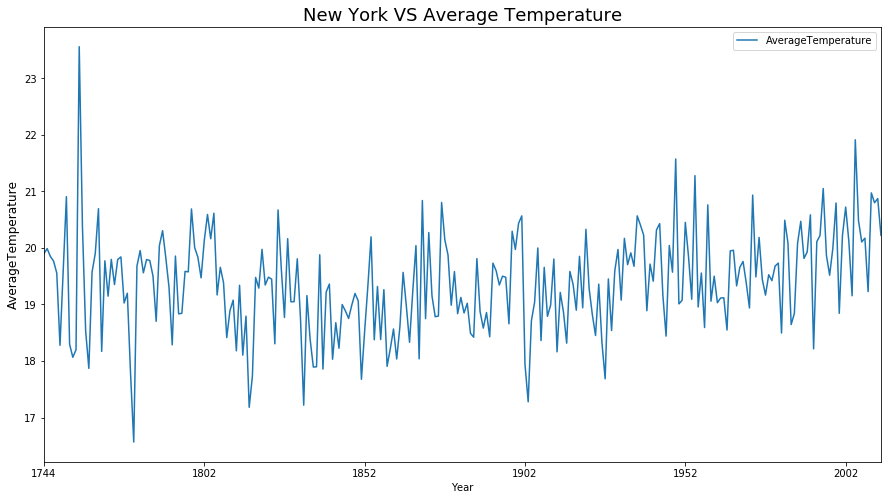

In [15]:
#Plotting  New York VS  Average Temperature
New_York_State_temp_mean.plot("Year",'AverageTemperature',figsize=(15,8))
plt.ylabel("AverageTemperature", fontsize=12)
plt.xlabel("Year")
plt.title("New York VS Average Temperature", fontsize=18)
plt.show

# JUNE JULY AUGUST DATA OF CALIFORNIA WITH TEMPERATURE


<function matplotlib.pyplot.show(*args, **kw)>

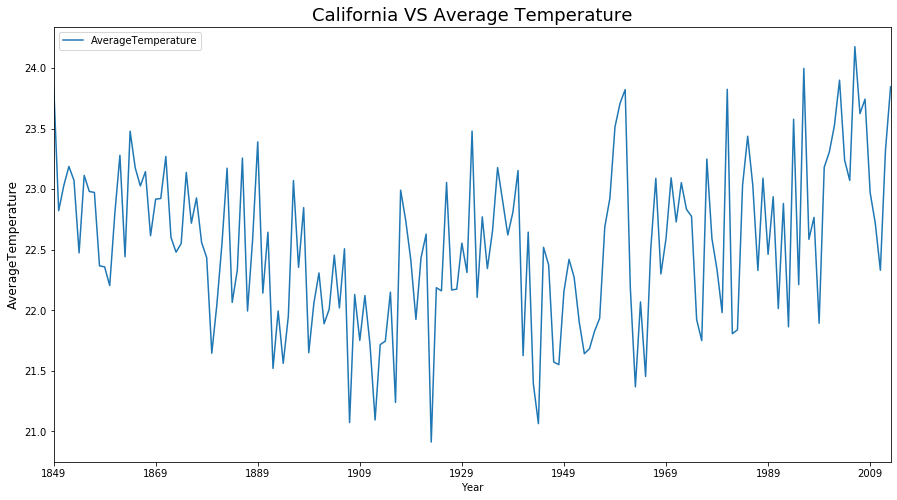

In [18]:
# From (june_july_august_data) Extracting only California
#Taking out mean  of Average temperature  for  each  same year
#Plotting  California VS  Average Temperature
California_data=june_july_august_data[(june_july_august_data['State'] == 'California')]
California_State_group = California_data.groupby(["State","Year"], as_index=False)
California_State_temp_mean = California_State_group.mean()
California_State_temp_mean.plot("Year",'AverageTemperature',figsize=(15,8))
plt.ylabel("AverageTemperature", fontsize=12)
plt.xlabel("Year")
plt.title("California VS Average Temperature", fontsize=18)
plt.show

# JUNE JULY AUGUST DATA OF NEW JERSEY WITH TEMPERATURE


<function matplotlib.pyplot.show(*args, **kw)>

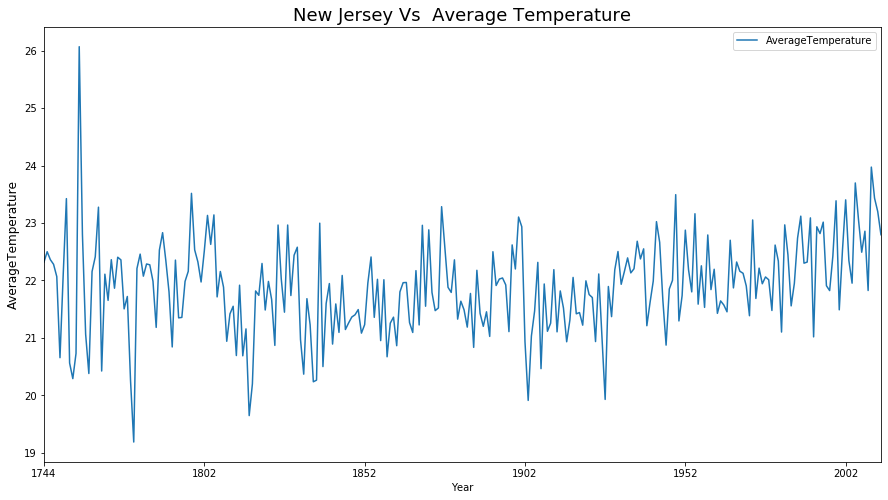

In [20]:
# From (june_july_august_data) Extracting only New Jersey
#Taking out mean  of Average temperature  for  each  same year
#Plotting  New Jersey VS  Average Temperature
New_Jersey_data=june_july_august_data[(june_july_august_data['State'] == 'New Jersey')]
New_Jersey_State_group = New_Jersey_data.groupby(["State","Year"], as_index=False)
New_Jersey_State_temp_mean = New_Jersey_State_group.mean()
New_Jersey_State_temp_mean.plot("Year",'AverageTemperature',figsize=(15,8))
plt.ylabel("AverageTemperature", fontsize=12)
plt.xlabel("Year")
plt.title("New Jersey Vs  Average Temperature", fontsize=18)
plt.show